## Global Surface Temperature Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
global_temp = pd.read_csv('GlobalTemperature.csv')
global_temp.head()

,Country,ISO3,Indicator,Unit,Source,1961,1962,1963,1964,1965,...,2017,2018,2019,2020,2021,2022,Sub-Region,Income Group,Area (KM²),Density (KM²)
0,Albania,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.627,0.326,0.075,-0.166,-0.388,...,1.121,2.028,1.675,1.498,1.536,1.518,Europe & Central Asia,Upper middle income,28748.0,103
1,Algeria,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.164,0.114,0.077,0.250,-0.100,...,1.512,1.210,1.115,1.926,2.330,1.688,Middle East & North Africa,Lower middle income,2381741.0,19
2,American Samoa,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.079,-0.042,0.169,-0.140,-0.562,...,1.435,1.189,1.539,1.430,1.268,1.256,East Asia & Pacific,High income,199.0,220
3,Angola,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.041,-0.152,-0.190,-0.229,-0.196,...,0.870,1.395,1.752,1.162,1.553,1.212,Sub-Saharan Africa,Lower middle income,1246700.0,29
4,Antigua and Barbuda,ATG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,0.090,0.031,0.288,0.214,-0.385,...,0.958,0.627,0.797,1.131,0.862,0.770,Latin America & Caribbean,High income,442.0,214


### Data Transformation

#### Data Cleaning and Manipulation
- **Initial Dataset Structure**: The original dataset was structured in a wide format with separate columns for each year, making it cumbersome for efficient analysis and visualization.
- **Transformation Need**: To facilitate easier reading, manipulation, and more sophisticated analyses like time series forecasting, the dataset required restructuring.
- **Method Used**: Employed the `melt()` function from pandas to transform the data from a wide format (many columns) to a long format (fewer columns). This method consolidates the yearly data into two columns: one for the year and another for the temperature values.
- **Advantages of Long Format**:
  - **Enhanced Readability**: Simplifies the dataset, making it easier to explore and visualize.
  - **Flexibility in Analysis**: Facilitates a range of data operations, including aggregation, comparison, and trend analysis across different years and other categorical dimensions.

In [3]:
# Changing the data set from a wide format to long to be easier to work with

temp_by_year = pd.melt(global_temp, id_vars=["Country", "ISO3", "Indicator", "Unit", "Source", "Sub-Region", "Income Group", "Area (KM²)", "Density (KM²)"],
                  var_name="Year", value_name="Value")
temp_by_year

,Country,ISO3,Indicator,Unit,Source,Sub-Region,Income Group,Area (KM²),Density (KM²),Year,Value
0,Albania,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,Europe & Central Asia,Upper middle income,28748.0,103,1961,0.627
1,Algeria,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,Middle East & North Africa,Lower middle income,2381741.0,19,1961,0.164
2,American Samoa,ASM,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,East Asia & Pacific,High income,199.0,220,1961,0.079
3,Angola,AGO,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,Sub-Saharan Africa,Lower middle income,1246700.0,29,1961,0.041
4,Antigua and Barbuda,ATG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,Latin America & Caribbean,High income,442.0,214,1961,0.090
...,...,...,...,...,...,...,...,...,...,...,...
8737,United States,USA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,North America,High income,9372610.0,37,2022,1.217
8738,Uruguay,URY,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,Latin America & Caribbean,High income,181034.0,20,2022,0.382
8739,Vanuatu,VUT,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,East Asia & Pacific,Lower middle income,12189.0,27,2022,1.479
8740,Zambia,ZMB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,Sub-Saharan Africa,Lower middle income,752612.0,28,2022,0.686


## Description of melt() Function

The melt() function in pandas transforms data from a wide format, where each data point has its own column, to a long format, where all data points are in a single column accompanied by another column that labels the data (e.g., year). This will make working with this data set and getting more accurate analysis much easier. It will also allow us to do a time series analysis, and some predictive analysis much more easily.

### Dataset Column Descriptions

- **Country**: The name of the country or region.
- **ISO3**: The three-letter ISO code representing the country.
- **Indicator**: Specific data being measured, here, the temperature change with respect to a baseline.
- **Unit**: Unit of measurement, in this case, degrees Celsius.
- **Source**: Organization that provided the data, e.g., Food and Agriculture Organization of the United Nations.
- **Sub-Region**: Geographical or political region the country belongs to, e.g., Europe & Central Asia.
- **Income Group**: World Bank's classification of the country's income level, e.g., Upper middle income.
- **Area (KM²)**: Total land area of the country in square kilometers.
- **Density (KM²)**: Population density per square kilometer.
- **Year**: The year the data was recorded.
- **Value**: Measured temperature change for the year.


In [4]:
# Dropping 'Unit', 'Indicator', and 'Source' columns from the DataFrame

temp_by_year = temp_by_year.drop(['Indicator', 'Unit', 'Source'], axis=1)

### Column Removal Explanation

The columns 'Unit', 'Indicator', and 'Source' are being dropped from this DataFrame for the following reasons:

- **Redundancy**: These columns contain uniform data across all entries, which adds no additional value to this specific analysis.
- **Simplification**: Removing these columns simplifies the dataset, making the DataFrame easier to manage and analyze.
- **Documentation**: Details about these columns are documented at the top of this report and are retained in the original dataset for reference.

This step helps focus our analysis on the dynamic elements of the dataset, such as geographic and temporal variations.

In [5]:
temp_by_year

,Country,ISO3,Sub-Region,Income Group,Area (KM²),Density (KM²),Year,Value
0,Albania,ALB,Europe & Central Asia,Upper middle income,28748.0,103,1961,0.627
1,Algeria,DZA,Middle East & North Africa,Lower middle income,2381741.0,19,1961,0.164
2,American Samoa,ASM,East Asia & Pacific,High income,199.0,220,1961,0.079
3,Angola,AGO,Sub-Saharan Africa,Lower middle income,1246700.0,29,1961,0.041
4,Antigua and Barbuda,ATG,Latin America & Caribbean,High income,442.0,214,1961,0.090
...,...,...,...,...,...,...,...,...
8737,United States,USA,North America,High income,9372610.0,37,2022,1.217
8738,Uruguay,URY,Latin America & Caribbean,High income,181034.0,20,2022,0.382
8739,Vanuatu,VUT,East Asia & Pacific,Lower middle income,12189.0,27,2022,1.479
8740,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,752612.0,28,2022,0.686


### Visualizations Overview

#### 1. Line Graph for Time Series Analysis
- **Purpose**: Shows trends over time by plotting the average temperature change per year.
- **Description**: This line graph visualizes how temperature changes have evolved over the years within a specific sub-region or globally. It helps in identifying overall trends such as increasing or decreasing temperatures.
- **Usefulness**: Effective for observing long-term trends and cyclic behavior over time.

#### 2. Pivot Table Graph
- **Purpose**: Analyzes the average temperature change by region and income group.
- **Description**: A pivot table graph that aggregates temperature changes across different regions and correlates them with income groups, showing average temperature changes for each category.
- **Usefulness**: Useful for identifying patterns or discrepancies in temperature changes across different socio-economic conditions and geographical areas.

#### 3. Crosstab Graph
- **Purpose**: Displays the frequency of temperature change categories by sub-region.
- **Description**: This bar graph uses a crosstab to count how many countries in each sub-region experienced increases or decreases in temperature. Each bar is segmented into two categories, "Increase" and "Decrease," reflecting the number of countries falling into each category.
- **Usefulness**: Provides a clear visual comparison of regional impacts of temperature changes, showing which regions are experiencing more severe changes.

#### 4. Heatmap
- **Purpose**: Visualizes complex data matrices to show relationships between multiple variables.
- **Description**: A heatmap that displays average temperature changes across years and sub-regions, with colors indicating the magnitude of change. This visualization helps to quickly identify which years and regions experienced higher or lower changes in temperature.
- **Usefulness**: Excellent for spotting outliers, trends, and patterns across two dimensions, making it easier to pinpoint specific areas and times of interest or concern.

### Summary of Visual Analysis
These visualizations collectively provide a comprehensive view of the temperature data, each serving a specific purpose in the overall analysis. By integrating various types of graphs, we can obtain a deeper understanding of the data and draw more nuanced conclusions about temporal and spatial variations in temperature changes.


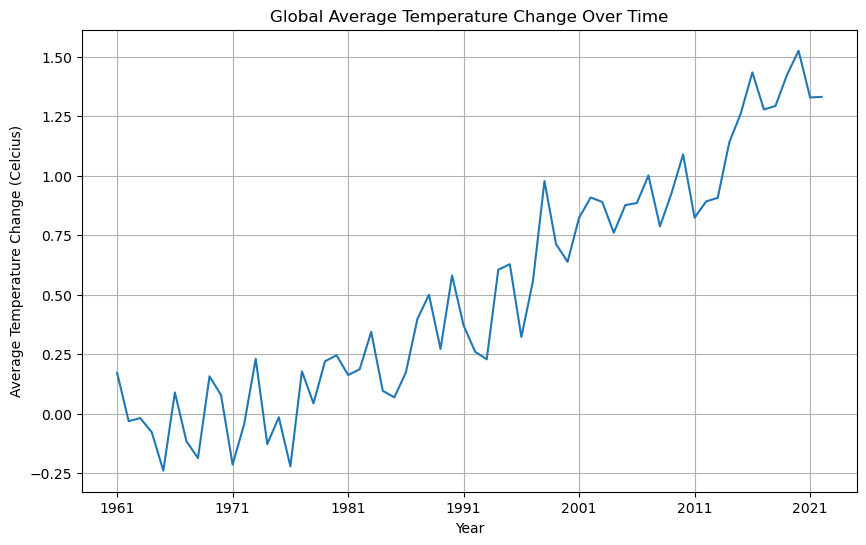

In [6]:
# Calculate aveage temperature change by year

avg_temp_by_year = temp_by_year.groupby('Year')['Value'].mean()

# Plot for data visualization

plt.figure(figsize=(10,6))
avg_temp_by_year.plot()
plt.title('Global Average Temperature Change Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change (Celcius)')
plt.grid(True)
plt.show()

In [7]:
# Create a pivot table for average temperature change by region and income group
# aggfunc is mean by defualt

pivot_table = temp_by_year.pivot_table(values='Value', index='Sub-Region', columns='Income Group')
pivot_table

Income Group,High income,Low income,Lower middle income,Upper middle income
Sub-Region,,,,
East Asia & Pacific,0.458172,NaN,0.467551,0.435032
Europe & Central Asia,0.634607,NaN,0.687801,0.576061
Latin America & Caribbean,0.440753,NaN,0.494448,0.464937
Middle East & North Africa,0.519779,NaN,0.597687,0.543153
North America,0.569960,NaN,NaN,NaN
South Asia,NaN,NaN,0.315648,0.384849
Sub-Saharan Africa,0.400065,0.536806,0.493753,0.378245


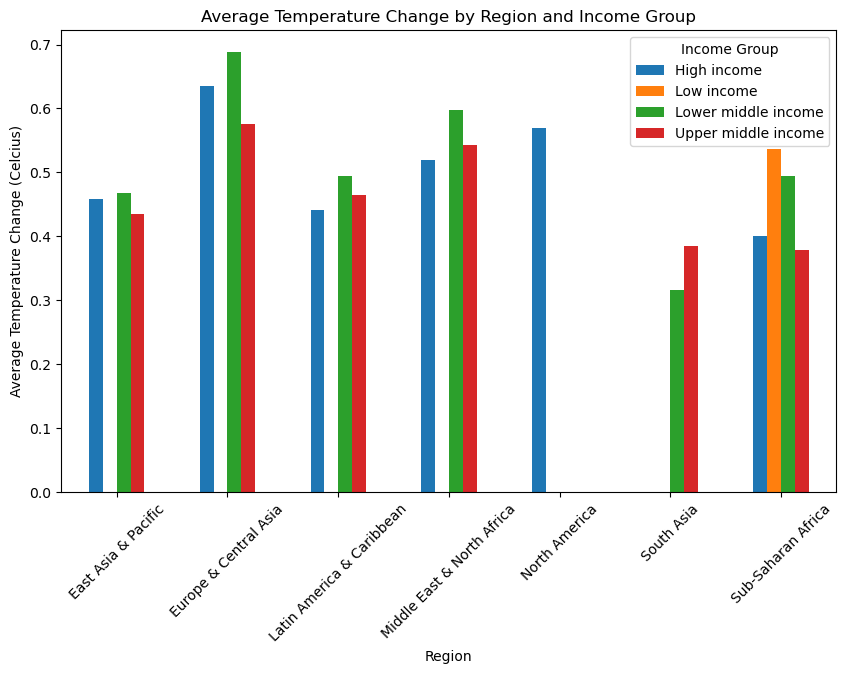

In [8]:
# Plotting for data visualizaton

pivot_table.plot(kind='bar', figsize=(10,6))
plt.title('Average Temperature Change by Region and Income Group')
plt.xlabel('Region')
plt.ylabel('Average Temperature Change (Celcius)')
plt.legend(title='Income Group')
plt.xticks(rotation=45)
plt.show()

In [9]:
# Categorize temperature change by 'Increase' or 'Decrease'

temp_by_year['Temp Change Category'] = pd.cut(temp_by_year['Value'], bins =[-float('inf'), 0, float('inf')], labels=['Decrease', 'Increase'])

# Create a crosstab

temp_crosstab = pd.crosstab(index=temp_by_year['Sub-Region'], columns=temp_by_year['Temp Change Category'])

temp_crosstab

Temp Change Category,Decrease,Increase
Sub-Region,,
East Asia & Pacific,239,1063
Europe & Central Asia,556,1614
Latin America & Caribbean,370,1552
Middle East & North Africa,244,686
North America,31,93
South Asia,124,310
Sub-Saharan Africa,376,1484


<function matplotlib.pyplot.show(close=None, block=None)>

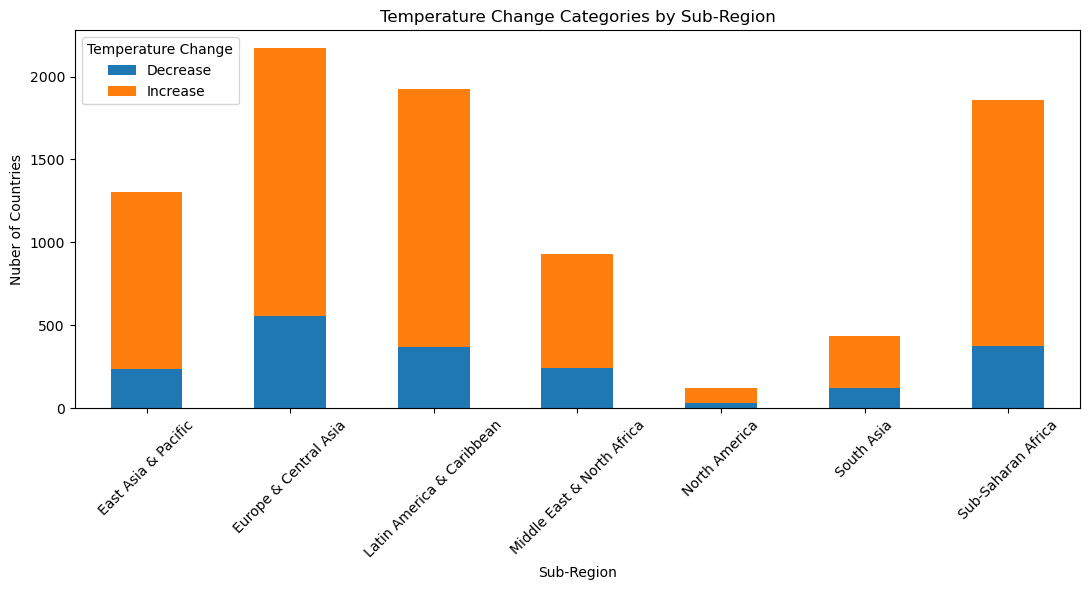

In [10]:
temp_crosstab.plot(kind='bar', stacked=True, figsize=(11,6))

plt.title('Temperature Change Categories by Sub-Region')
plt.xlabel('Sub-Region')
plt.ylabel('Nuber of Countries') # number of countries that saw an increase/decrease
plt.xticks(rotation=45)
plt.legend(title='Temperature Change', loc='upper left')
plt.tight_layout()
plt.show

In [11]:
# Create a pivot table to get the average value by Sub-Region by Year

pivot_table_hm = temp_by_year.pivot_table(values='Value', index='Sub-Region', columns='Year')
pivot_table_hm

Year,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Sub-Region,,,,,,,,,,,,,,,,,,,,,
East Asia & Pacific,0.036371,0.011964,-0.059999,0.005810,-0.311238,0.010857,-0.159524,-0.227714,0.095571,0.121381,...,0.947619,0.884619,0.996333,1.424737,1.229290,1.103294,1.366527,1.419286,1.204288,1.237717
Europe & Central Asia,0.632576,-0.106793,-0.286165,0.016884,-0.379040,0.074916,0.150023,-0.119984,-0.133932,-0.181182,...,0.981343,1.823400,1.519714,1.723714,1.492943,1.835943,1.813029,2.094000,1.481086,2.068114
Latin America & Caribbean,0.062303,-0.096565,0.077131,-0.049431,-0.105171,-0.016193,-0.162090,-0.184855,0.316138,0.050296,...,0.782220,0.911003,1.204907,1.174354,1.110232,0.943371,1.210358,1.447438,1.039680,0.890165
Middle East & North Africa,-0.050733,0.496400,0.349600,-0.281267,-0.066667,0.475267,-0.418333,-0.245933,0.317933,0.234933,...,1.154533,1.235200,1.461467,1.564067,1.434533,1.687733,1.376400,1.589933,2.021533,1.641933
North America,0.030000,-0.072000,0.376500,-0.290500,-0.614500,-0.183000,-0.188000,0.201500,-0.135000,0.198000,...,0.898000,0.394500,1.381000,2.298500,1.456500,0.876500,1.172500,1.226000,1.829500,1.242500
South Asia,0.010400,-0.268429,-0.019710,-0.008445,-0.265594,0.210857,-0.232000,-0.301143,0.176286,0.126597,...,0.559143,0.618571,0.810286,1.319714,1.155857,0.964286,1.013286,0.802286,1.092714,1.119714
Sub-Saharan Africa,-0.003773,-0.113858,0.011568,-0.178537,-0.222905,0.065034,-0.165693,-0.208316,0.308209,0.278106,...,0.876687,0.879440,1.202707,1.273732,1.172206,1.060111,1.363904,1.170086,1.210636,0.890637


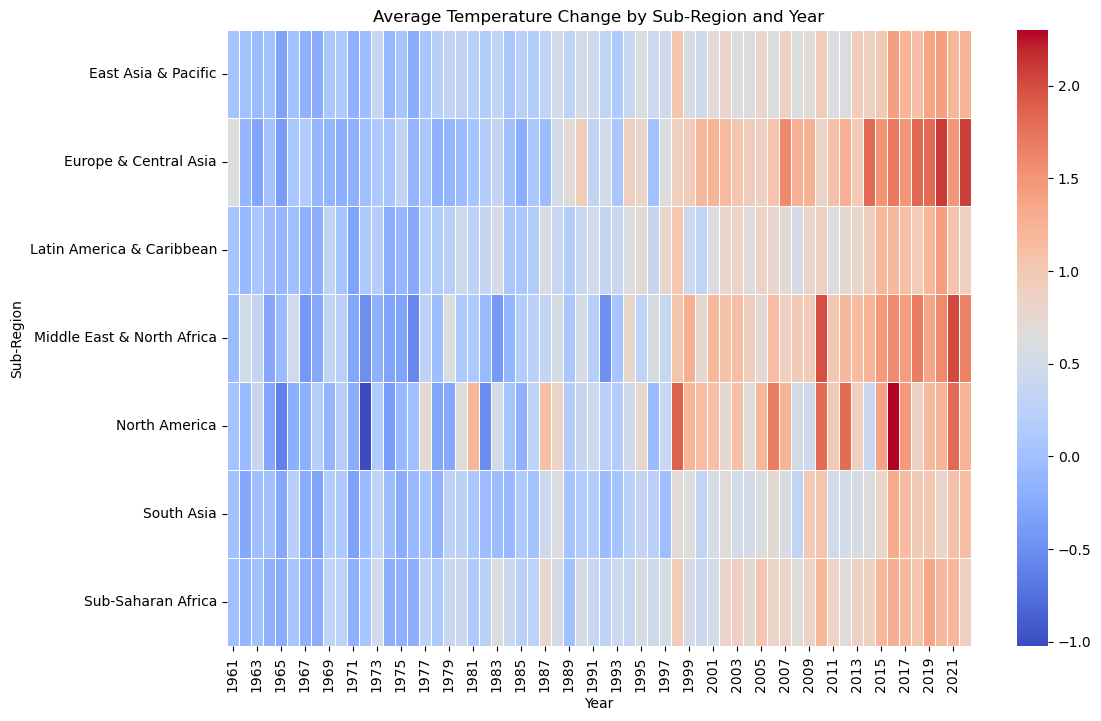

In [12]:
plt.figure(figsize=(12,8))

sns.heatmap(pivot_table_hm, cmap='coolwarm', linewidths=.5)
plt.title('Average Temperature Change by Sub-Region and Year')
plt.ylabel('Sub-Region')
plt.xlabel('Year')
plt.show()

### Summary of ARIMA Modeling Process

#### Data Preparation
- **Data Selection**: Selected temperature change data specific to a sub-region.
- **Annual Aggregation**: Aggregated the data annually to form a time series of average temperature changes per year.

#### Initial Model Setup
- **Manual Configuration**: Initially configured an ARIMA model with manually chosen parameters.
- **Data Splitting**: Split the dataset into training (80%) and testing (20%) segments chronologically to validate the model's performance on unseen data.

#### Automated Parameter Selection
- **`auto_arima` Implementation**: Utilized `auto_arima` from the `pmdarima` package to automatically determine the most appropriate (p, d, q) parameters.
- **Statistical Criteria**: This method evaluates several combinations based on AIC/BIC criteria to find the optimal model configuration, improving initial guesswork and ensuring a statistically robust model.

#### Model Fitting and Forecasting
- **Model Fitting**: Fitted the ARIMA model with the parameters suggested by `auto_arima` on the training data.
- **Forecasting**: Forecasted temperature changes for the test period and compared predictions against actual observed values.

#### Performance Evaluation
- **Error Metric**: Calculated the Mean Absolute Error (MAE) to quantify the average magnitude of the errors in predictions.
- **Improvement Noted**: Initial tests showed an MAE improvement from 0.53 to 0.50 after refining the model with `auto_arima`.


#### Visualization
- **Visual Assessment**: Visualized the training data, test data, and forecasted values to assess the model’s fit and to identify any discrepancies or areas for further improvement.


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima

In [14]:
# Group the average temperature change by year in North America

data = temp_by_year[temp_by_year['Sub-Region'] == 'North America']
time_series = data.groupby('Year')['Value'].mean()

time_series

Year
1961    0.0300
1962   -0.0720
1963    0.3765
1964   -0.2905
1965   -0.6145
         ...  
2018    0.8765
2019    1.1725
2020    1.2260
2021    1.8295
2022    1.2425
Name: Value, Length: 62, dtype: float64

In [15]:
# Calculate the index to splt the data (80% train, %20 test)

split_index = int(len(time_series) * .8)

train_data = time_series[:split_index]
test_data = time_series[split_index:]

In [16]:
auto_model = auto_arima(train_data, start_p=1, start_q=1,
                        max_p=5, max_q=5, m=1,
                        seasonal=False, d=None, trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

auto_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=92.736, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=88.824, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=90.747, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=81.188, Time=0.01 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=80.324, Time=0.02 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=82.206, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=78.593, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=79.286, Time=0.01 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=80.532, Time=0.01 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=77.919, Time=0.01 sec
 ARIMA(2,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 -33.972
Date:                Tue, 23 Apr 2024   AIC                             75.944
Time:                        16:27:58   BIC                             83.428
Sample:                    01-01-1961   HQIC                            78.772
                         - 01-01-2009                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0267      0.229      0.116      0.907      -0.423       0.476
ar.L2         -0.2478      0.189     -1.313      0.189      -0.618       0.122
ma.L1         -0.7122      0.211     -3.380      0.001      -1.125      -0.299
sigma2         0.2360      0.055      4.275      0.000       0.128       0.344
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.78   Prob(JB):                         0.60
Heteroskedasticity (H):               1.37   Skew:                             0.35
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
model = ARIMA(train_data, order=auto_model.order)
model_fit = model.fit()

/Users/williamkendrick/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/williamkendrick/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/williamkendrick/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [18]:
pred = model_fit.forecast(steps=len(test_data))

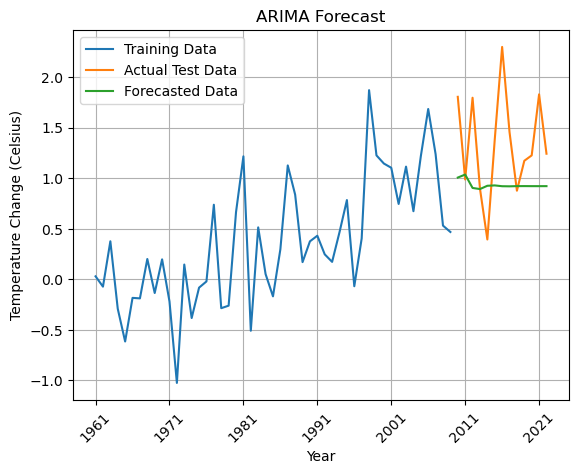

In [19]:
fig, ax = plt.subplots()
ax.plot(train_data.index, train_data, label='Training Data')
ax.plot(test_data.index, test_data, label='Actual Test Data')
ax.plot(test_data.index, pred, label='Forecasted Data')

ax.xaxis.set_major_locator(ticker.MultipleLocator(10))

plt.title('ARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature Change (Celsius)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [20]:
mae = mean_absolute_error(test_data, pred)

print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 0.50


# Gradient Boosting Model Development

## Overview
This documentation outlines the process of developing and refining a Gradient Boosting Regressor (GBR) model for time series forecasting. It covers the steps from initial data preprocessing and feature engineering through model training and evaluation.

## 1. Feature Engineering
- **Lagged Features**: Integrated a 1-year lag (`lag_1`) to include previous year data as a predictor for capturing autocorrelation in the time series.
- **Rolling Window Features**: Added a rolling mean over a 3-year window (`rolling_mean_3`) to smooth out fluctuations and highlight underlying trends in the data.

## 2. Data Preprocessing
### Data Splitting
The dataset was split into training (80%) and testing (20%) sets to evaluate the model on unseen data, maintaining the chronological order essential for time series analysis.

### Handling Missing Values
- **Imputation Strategy**: Used mean imputation for missing values resulting from the creation of lagged and rolling features to avoid data loss and maintain the dataset's integrity.

## 3. Model Development
### Initial Model Configuration
- **Parameters**: 
  - `n_estimators`: 100
  - `learning_rate`: 0.1
  - `max_depth`: 2

### Model Refinement
To enhance model performance, parameters were adjusted:
- **Updated Parameters**:
  - `n_estimators`: Increased to 350 to allow the model to learn more complex patterns.
  - `learning_rate`: Adjusted to 0.7 to expedite the learning process.
  - `max_depth`: Increased to 10 to capture deeper interactions in the data.

## 4. Model Evaluation
Evaluated the model's performance using key metrics:
- **Mean Absolute Error (MAE)**: Improved from 0.61 to 0.44, indicating more accurate predictions.
- **Root Mean Squared Error (RMSE)** and **R² Score**: Used to assess the model's prediction error magnitude and the proportion of variance explained, respectively.

## 5. Visualization of Results
- Visual comparisons of actual vs. predicted values were performed to visually assess model accuracy and pinpoint areas where the model might be underperforming.

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
data = temp_by_year[temp_by_year['Sub-Region'] == 'North America']
time_series = data.groupby('Year')['Value'].mean().reset_index()

time_series

,Year,Value
0,1961,0.0300
1,1962,-0.0720
2,1963,0.3765
3,1964,-0.2905
4,1965,-0.6145
...,...,...
57,2018,0.8765
58,2019,1.1725
59,2020,1.2260
60,2021,1.8295


In [23]:
time_series['lag_1'] = time_series['Value'].shift(1)
time_series['rolling_mean_3'] = time_series['Value'].rolling(window=3).mean()

# Drop NaN values after lagging and rolling means

time_series.dropna(inplace=True)

In [24]:
# Getting the training and testing data and making sure they are df 

train_data = time_series.iloc[:split_index]
test_data = time_series.iloc[split_index:]

In [25]:
# There seem to be NaN values in the data so let's remove them

print("Training data NaN counts:")
print(X_train.isna().sum())
print("\nTesting data NaN counts:")
print(X_test.isna().sum())

Training data NaN counts:


NameError: name 'X_train' is not defined

In [26]:
X_train = train_data.drop('Value', axis=1)
y_train = train_data['Value']
X_test = test_data.drop('Value', axis=1)
y_test = test_data['Value']

In [27]:
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)

X_test = imputer.transform(X_test)

In [28]:
X_train = pd.DataFrame(X_train, columns=train_data.drop('Value', axis=1).columns)
X_test = pd.DataFrame(X_test, columns=test_data.drop('Value', axis=1).columns)

In [29]:
print(X_train.isna().sum())
print(X_test.isna().sum())

Year              0
lag_1             0
rolling_mean_3    0
dtype: int64
Year              0
lag_1             0
rolling_mean_3    0
dtype: int64


In [30]:
model = GradientBoostingRegressor(n_estimators=350, learning_rate=0.7, 
                                  max_depth=10, random_state=42, loss='squared_error')
model.fit(X_train, y_train)

pred = model.predict(X_test)

pred

array([1.68449997, 1.23545713, 1.14375896, 1.87099998, 1.17095873,
       1.21254069, 1.21254124, 1.68449997, 0.66462808, 1.1455    ,
       1.21254069])

In [31]:
mae = mean_absolute_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 0.47
Root Mean Squared Error: 0.56
R² Score: -0.25


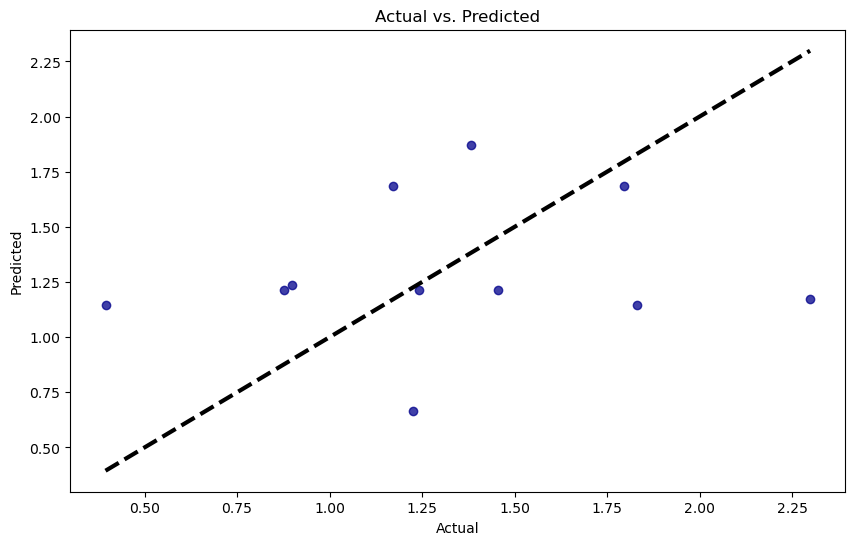

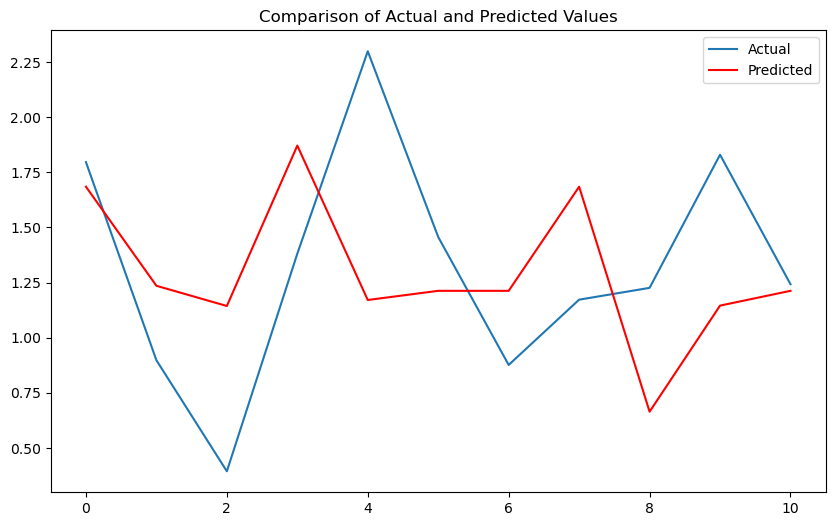

In [32]:
# Plotting actual vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, alpha=0.75, color='darkblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3) 
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Alternatively, line plots for time series forecast visual comparison

plt.figure(figsize=(10, 6))
plt.plot(y_test.reset_index(drop=True), label='Actual')
plt.plot(pred, label='Predicted', color='red')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()